In [3]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt


In [4]:
digits = datasets.load_digits()

In [8]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(digits.data),
digits.target, test_size=0.30, random_state=42)

(trainData, devset, trainLabels, devLabels) = train_test_split(trainData, trainLabels,
test_size=0.15, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(devLabels)))
print("testing data points: {}".format(len(testLabels)))


NameError: name 'digits' is not defined

In [6]:
kVals = range(1, 30, 2)
accuracies = []
for k in range(1, 30, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    score = model.score(devset, devLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)
    i = np.argmax(accuracies)
    print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],accuracies[i] * 100))
    model = KNeighborsClassifier(n_neighbors=kVals[i])
    model.fit(trainData, trainLabels)
    predictions = model.predict(testData)
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))


print ("Confusion matrix")

print(confusion_matrix(testLabels,predictions))



k=1, accuracy=97.35%
k=1 achieved highest accuracy of 97.35% on validation data
k=3, accuracy=96.83%
k=1 achieved highest accuracy of 97.35% on validation data
k=5, accuracy=98.41%
k=5 achieved highest accuracy of 98.41% on validation data
k=7, accuracy=97.88%
k=5 achieved highest accuracy of 98.41% on validation data
k=9, accuracy=97.35%
k=5 achieved highest accuracy of 98.41% on validation data
k=11, accuracy=96.83%
k=5 achieved highest accuracy of 98.41% on validation data
k=13, accuracy=96.83%
k=5 achieved highest accuracy of 98.41% on validation data
k=15, accuracy=96.83%
k=5 achieved highest accuracy of 98.41% on validation data
k=17, accuracy=96.30%
k=5 achieved highest accuracy of 98.41% on validation data
k=19, accuracy=95.77%
k=5 achieved highest accuracy of 98.41% on validation data
k=21, accuracy=95.77%
k=5 achieved highest accuracy of 98.41% on validation data
k=23, accuracy=95.24%
k=5 achieved highest accuracy of 98.41% on validation data
k=25, accuracy=94.71%
k=5 achieve

The digit is : 7


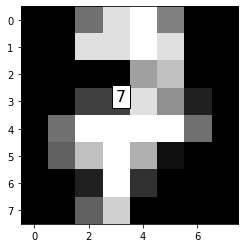

The digit is : 9


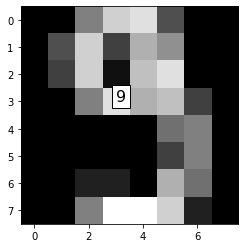

The digit is : 4


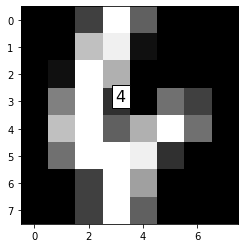

In [10]:
for i in np.random.randint(0, high=len(testLabels), size=(3,)):
    image = testData[i]
    prediction = model.predict([image])[0]
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("The digit is : {}".format(prediction))
    plt.show()
